# วิเคราะห์รายการสินค้าใกล้เคียงจาก item_hierarchy.csv

In [3]:
import pandas as pd

file_path = 'item_hierarchy.csv'
df = pd.read_csv(file_path)
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\2820782263.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


item_id  category_id        category  subcategory_id subcategory     brand
0    1899          1.0  1 : FRESH FOOD             148   VEGETABLE  NO BRAND
1    5088          1.0  1 : FRESH FOOD             149       FRUIT  NO BRAND
2    5339          1.0  1 : FRESH FOOD             149       FRUIT  NO BRAND
3    7110          1.0  1 : FRESH FOOD             158        BEEF  NO BRAND
4    7641          1.0  1 : FRESH FOOD             157        PORK  NO BRAND

In [4]:
import pandas as pd
from difflib import get_close_matches

# โหลดข้อมูล
file_path = "item_hierarchy.csv"
df = pd.read_csv(file_path)

# ดึงเฉพาะคำซ้ำและไม่ซ้ำใน subcategory
subcategory_list = df['subcategory'].dropna().unique().tolist()
subcategory_list = sorted(set([s.strip().lower() for s in subcategory_list]))  # ลบซ้ำ + ทำให้เป็น lowercase

# สร้างกลุ่มคำคล้ายกัน
grouped_keywords = []
used = set()

for word in subcategory_list:
    if word in used:
        continue
    matches = get_close_matches(word, subcategory_list, n=10, cutoff=0.8)
    if len(matches) > 1:
        grouped_keywords.append(matches)
        used.update(matches)

# แสดงผลลัพธ์
for i, group in enumerate(grouped_keywords, 1):
    print(f"กลุ่มที่ {i}: {group}")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\1386511023.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


กลุ่มที่ 1: ['accessories', 'av accessories', 'men accessories', 'cs2-accessories', 'baby accessories']
กลุ่มที่ 2: ['agricultural product', 'cs2-agricultural product', 'b2b-agricultural product']
กลุ่มที่ 3: ['b2b-bakery bought in', 'bakery bought in']
กลุ่มที่ 4: ['b2b-baking needs', 'baking needs', 'b2b-cooking needs']
กลุ่มที่ 5: ['b2b-canned food', 'canned food']
กลุ่มที่ 6: ['b2b-chilled convenience', 'chilled convenience', 'ws chilled convenience']
กลุ่มที่ 7: ['b2b-cold beverage', 'cold beverage', 'cp-cold beverage', 'b2b-hot beverage']
กลุ่มที่ 8: ['b2b-confectionery', 'confectionery']
กลุ่มที่ 9: ['b2b-dairy grocery', 'dairy grocery', 'cp-dairy grocery']
กลุ่มที่ 10: ['b2b-fish+seafood', 'cs2-fish+seafood', 'fish+seafood']
กลุ่มที่ 11: ['b2b-food supplement', 'food supplement', 'cp-food supplement', 'cs2-food supplyment']
กลุ่มที่ 12: ['b2b-frozen meat', 'frozen meat']
กลุ่มที่ 13: ['b2b-pasta+instant food', 'pasta+instant food']
กลุ่มที่ 14: ['b2b-preserved+ dried', 'cs2-pre

In [5]:
import pandas as pd

# โหลดไฟล์
item_df = pd.read_csv("item_hierarchy.csv")
item_df['subcategory'] = item_df['subcategory'].astype(str).str.strip().str.lower()

# หาค่าไม่ซ้ำ
unique_subcategories = item_df['subcategory'].dropna().unique()

# สร้าง DataFrame และเรียง
df_unique_subcategories = pd.DataFrame(sorted(unique_subcategories), columns=["subcategory"])

# แสดงผล
print(df_unique_subcategories)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\3861412886.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  item_df = pd.read_csv("item_hierarchy.csv")


              subcategory
0                ac + fan
1             accessories
2    agricultural product
3         arabitia bakery
4       arabitia beverage
..                    ...
496              ws salad
497       ws sausage+ball
498            ws tobacco
499          ws vegetable
500       yoghurt+dessert

[501 rows x 1 columns]


In [6]:
df['subcategory_lower'] = df['subcategory'].str.lower()

In [7]:
keywords = ['pork', 'beef', 'vegetable', 'fruit', 'fish', 'snack', 'milk', 'water', 'egg', 'rice']

In [8]:
results = {}

for keyword in keywords:
    matched = df[df['subcategory_lower'].str.contains(keyword, case=False, na=False)]
    if not matched.empty:
        results[keyword] = matched[['item_id', 'subcategory']].drop_duplicates()

if results:
    combined_df = pd.concat(results.values(), keys=results.keys()).reset_index(level=0).rename(columns={'level_0': 'keyword'})
    display(combined_df)
else:
    print('ไม่พบคำที่ตรงกับ subcategory ใดเลยในไฟล์นี้')

keyword    item_id subcategory
4          pork       7641        PORK
692        pork    9827269        PORK
2180       pork   17480981        PORK
3439       pork   23448938        PORK
4110       pork   25166921        PORK
...         ...        ...         ...
2656209    rice   51246098  LOOSE RICE
2656445    rice   51304479  LOOSE RICE
2736095    rice  406574446  LOOSE RICE
2736310    rice  406627523  LOOSE RICE
2736311    rice  406627538  LOOSE RICE

[59814 rows x 3 columns]

ดึง item_id ทั้งหมดที่เกี่ยวข้อง กับสินค้านั้น

In [37]:
import pandas as pd
from difflib import get_close_matches

# โหลดไฟล์หลัก
df = pd.read_csv("item_hierarchy.csv")

# โหลดไฟล์แปล
df_translate = pd.read_csv("subcategory_list_for_translation.csv")
df_translate.columns = ['subcategory', 'subcategory_th']
df_translate['subcategory'] = df_translate['subcategory'].str.strip()
df_translate['subcategory_lower'] = df_translate['subcategory'].str.lower()

# เตรียม df หลัก
df['subcategory'] = df['subcategory'].str.strip()
df['subcategory_lower'] = df['subcategory'].str.lower()

# รวมคำแปลเข้ากับ df หลัก
df = df.merge(df_translate[['subcategory_lower', 'subcategory_th']], how='left', on='subcategory_lower')

# สร้าง list สำหรับค้นหา
subcategory_list = df['subcategory_lower'].dropna().unique().tolist()

# ฟังก์ชันค้นหา
def find_items_by_input_name(input_keyword, cutoff=0.7, topn=5):
    input_keyword = input_keyword.lower()
    matches = get_close_matches(input_keyword, subcategory_list, n=topn, cutoff=cutoff)
    
    if matches:
        all_results = []
        print(f"🔍 คำค้น: '{input_keyword}' | พบ subcategory ใกล้เคียง {len(matches)} รายการ:\n")
        for match in matches:
            matched_items = df[df['subcategory_lower'] == match][['item_id', 'subcategory', 'subcategory_th']].drop_duplicates()
            print(f"🎯 '{match.upper()}' → แปลว่า: {matched_items['subcategory_th'].iloc[0] if not matched_items.empty else '-'}")
            all_results.append(matched_items)
        return pd.concat(all_results, ignore_index=True)
    else:
        print(f"⚠️ ไม่พบ subcategory ที่ใกล้เคียงกับ: '{input_keyword}'")
        return pd.DataFrame()

# ตัวอย่างการใช้
result = find_items_by_input_name("pork")
display(result)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\1973448923.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("item_hierarchy.csv")


🔍 คำค้น: 'pork' | พบ subcategory ใกล้เคียง 1 รายการ:

🎯 'PORK' → แปลว่า: เนื้อหมู


item_id subcategory subcategory_th
0          7641        PORK       เนื้อหมู
1       9827269        PORK       เนื้อหมู
2      17480981        PORK       เนื้อหมู
3      23448938        PORK       เนื้อหมู
4      25166921        PORK       เนื้อหมู
...         ...         ...            ...
1990  404425287        PORK       เนื้อหมู
1991  405395596        PORK       เนื้อหมู
1992  406733506        PORK       เนื้อหมู
1993  406829048        PORK       เนื้อหมู
1994  407694324        PORK       เนื้อหมู

[1995 rows x 3 columns]

In [38]:
def find_items_by_thai_keyword(thai_keyword):
    thai_keyword = thai_keyword.strip()
    matches = df[df['subcategory_th'].str.contains(thai_keyword, na=False)]

    if not matches.empty:
        grouped = matches[['item_id', 'subcategory', 'subcategory_th']].drop_duplicates()
        print(f"✅ พบคำว่า '{thai_keyword}' ในหมวดหมู่เหล่านี้:\n")
        for subcat in grouped['subcategory'].unique():
            th = grouped[grouped['subcategory'] == subcat]['subcategory_th'].iloc[0]
            print(f"🔸 {subcat} → {th}")
        return grouped
    else:
        print(f"❌ ไม่พบคำว่า '{thai_keyword}' ในหมวดหมู่ใดเลย")
        return pd.DataFrame()


In [71]:
result = find_items_by_thai_keyword("เคมีภัณฑ์")

display(result)


# แปลง item_id เป็นข้อความแล้วรวมด้วย comma
item_ids = ','.join(result['item_id'].astype(str).tolist())

# รวม subcategory ไม่ซ้ำ
subcategories = ','.join(result['subcategory'].drop_duplicates().tolist())

# รวม subcategory_th ไม่ซ้ำ
subcategories_th = ','.join(result['subcategory_th'].drop_duplicates().tolist())

# แสดงผล
print(f"item_id: {item_ids}")
print(f"subcategory: {subcategories}")
print(f"subcategory_th: {subcategories_th}")


✅ พบคำว่า 'เคมีภัณฑ์' ในหมวดหมู่เหล่านี้:

🔸 HOUSEHOLD CHEMICAL+GE → เคมีภัณฑ์ในครัวเรือน+GE


item_id            subcategory           subcategory_th
100        1565230  HOUSEHOLD CHEMICAL+GE  เคมีภัณฑ์ในครัวเรือน+GE
109        2471469  HOUSEHOLD CHEMICAL+GE  เคมีภัณฑ์ในครัวเรือน+GE
213        5318904  HOUSEHOLD CHEMICAL+GE  เคมีภัณฑ์ในครัวเรือน+GE
268        6226779  HOUSEHOLD CHEMICAL+GE  เคมีภัณฑ์ในครัวเรือน+GE
447        7762194  HOUSEHOLD CHEMICAL+GE  เคมีภัณฑ์ในครัวเรือน+GE
...            ...                    ...                      ...
2772269  407667566  HOUSEHOLD CHEMICAL+GE  เคมีภัณฑ์ในครัวเรือน+GE
2772365  407678321  HOUSEHOLD CHEMICAL+GE  เคมีภัณฑ์ในครัวเรือน+GE
2772824  407715727  HOUSEHOLD CHEMICAL+GE  เคมีภัณฑ์ในครัวเรือน+GE
2772890  407721419  HOUSEHOLD CHEMICAL+GE  เคมีภัณฑ์ในครัวเรือน+GE
2772904  407722822  HOUSEHOLD CHEMICAL+GE  เคมีภัณฑ์ในครัวเรือน+GE

[16407 rows x 3 columns]

item_id: 1565230,2471469,5318904,6226779,7762194,7824149,7962851,10645144,11332131,11416424,11459816,12134546,12146501,12918326,12941891,12960470,12965952,12984922,14951975,16743377,17006368,17330009,19266049,19565992,20358962,20481713,20696132,20910363,21567506,22936467,24048879,25167022,25301640,25337955,25748025,26094738,26284898,26459930,27031373,27382389,27454282,27454290,27603296,27836266,27876624,50153036,50219173,50264248,50353560,50417480,50431928,50438420,50457604,50466547,50625999,50643539,50643551,50657621,50741953,50840761,50848735,50851477,50885333,50888635,50969033,51111471,51226871,51255663,51281032,51290211,51291058,51303428,51304842,51317251,51379263,51430254,51464761,51470799,51628793,51833872,51882162,51970910,52189895,52205140,52385023,52454691,52477099,52515752,52548298,70528314,70529515,70616655,70754926,70754942,70764050,71134395,71445722,71449256,71502505,71502521,71549897,71549951,71833501,71856587,71856595,72308044,72398078,72467576,72490896,72542349,72589426

In [12]:
from datetime import date
import pandas as pd

def save_training_data_from_keyword(thai_keyword, export_path="training_data.csv"):
    matched_items = find_items_by_thai_keyword(thai_keyword)

    if matched_items.empty:
        print(f"❌ ไม่พบสินค้าใดตรงกับ '{thai_keyword}'")
        return

    today = date.today().isoformat()
    subcategory = matched_items['subcategory']
    item_ids = matched_items['item_id']

    # สร้างตารางข้อมูล
    training_df = pd.DataFrame({
        "date": today,
        "keyword_th": thai_keyword,
        "subcategory": subcategory,
        "item_id": item_ids
    })

    # บันทึกลงไฟล์แบบ append (ต่อท้าย)
    training_df.to_csv(export_path, mode='a', header=not pd.io.common.file_exists(export_path), index=False)
    print(f"✅ บันทึกข้อมูลเทรน AI จากคำว่า '{thai_keyword}' แล้ว!")

# ✅ ตัวอย่างใช้งาน
save_training_data_from_keyword("หมู")
save_training_data_from_keyword("ไก่")


✅ พบคำว่า 'หมู' ในหมวดหมู่เหล่านี้:

🔸 PORK → เนื้อหมู
🔸 CP SHOP IN SHOP PORK → CP SHOP ในร้านหมู
🔸 B2B-PORK → B2B-หมู
🔸 B2C NON LOTUS-PORK → B2C นอนโลตัส-หมู
🔸 RECEIVED BILL PAYMENT VILLAGE FUND → ได้รับเงินกองทุนหมู่บ้านจ่ายบิล
🔸 COMMISSION BILL PAYMENT VILLAGE FUND → กองทุนหมู่บ้านชำระค่าคอมมิชชัน
✅ บันทึกข้อมูลเทรน AI จากคำว่า 'หมู' แล้ว!
✅ พบคำว่า 'ไก่' ในหมวดหมู่เหล่านี้:

🔸 CP SHOP IN SHOP CHICKEN → CP SHOP ในร้านไก่
🔸 B2B-CHICKEN → B2B-ไก่
🔸 KAIDEE SHOP → ร้านไก่ดี
✅ บันทึกข้อมูลเทรน AI จากคำว่า 'ไก่' แล้ว!


In [13]:
# 1. นำเข้าไลบรารี
import pandas as pd
from difflib import SequenceMatcher

In [14]:
# 2. โหลดไฟล์
# ✔️ เปลี่ยน path ตามที่คุณเก็บไฟล์ไว้
item_df = pd.read_csv("item_hierarchy.csv")
df_translate = pd.read_csv("subcategory_list_for_translation.csv")
df_keywords = pd.read_csv("suggested_keywords_by_group_122.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\2924917228.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  item_df = pd.read_csv("item_hierarchy.csv")


In [15]:
# 3. เตรียมข้อมูล
df_translate.columns = ['subcategory', 'subcategory_th']
df_translate['subcategory'] = df_translate['subcategory'].str.strip().str.lower()
item_df['subcategory'] = item_df['subcategory'].str.strip().str.lower()
item_df = item_df.merge(df_translate, how='left', on='subcategory')

In [16]:
# 4. ฟังก์ชัน fuzzy matching
def is_similar(a, b, threshold=0.6):
    return SequenceMatcher(None, a, b).ratio() >= threshold

In [17]:
# 5. ค้นหาจาก suggested_keyword_th
matched_results = []

for _, row in df_keywords.iterrows():
    keywords = row['suggested_keyword_th'].split(",")
    for keyword in keywords:
        keyword = keyword.strip()
        matched_rows = item_df[item_df['subcategory_th'].apply(lambda x: is_similar(str(x), keyword))]
        if not matched_rows.empty:
            for _, match in matched_rows[['item_id', 'subcategory']].drop_duplicates().iterrows():
                matched_results.append({
                    "search_keyword_th": keyword,
                    "item_id": match['item_id'],
                    "subcategory": match['subcategory']
                })


KeyboardInterrupt: 

In [ ]:
# 6. แสดงผลลัพธ์
df_matched = pd.DataFrame(matched_results)
print(df_matched.head(10))  # แสดงตัวอย่าง


In [ ]:
# 7. (ไม่บังคับ) บันทึกออกเป็นไฟล์ CSV
df_matched.to_csv("matched_items_by_keyword.csv", index=False)

วันที่

In [18]:
import pandas as pd

# โหลดไฟล์
df = pd.read_csv("historical_sale_2023_1.csv")

# แปลงคอลัมน์วันที่ (สมมุติชื่อว่า 'date') ให้เป็น datetime
df['date'] = pd.to_datetime(df['date'])

# หาวันที่เริ่มต้นและสิ้นสุด
start_date = df['date'].min()
end_date = df['date'].max()

print(f"ข้อมูลยอดขายเริ่มตั้งแต่: {start_date.date()} ถึง {end_date.date()}")


ข้อมูลยอดขายเริ่มตั้งแต่: 2023-01-01 ถึง 2023-06-30


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\3441432075.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\3441432075.py:31: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\3441432075.py:31: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\3441432075.py:31: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\3441432075.py:31: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\L

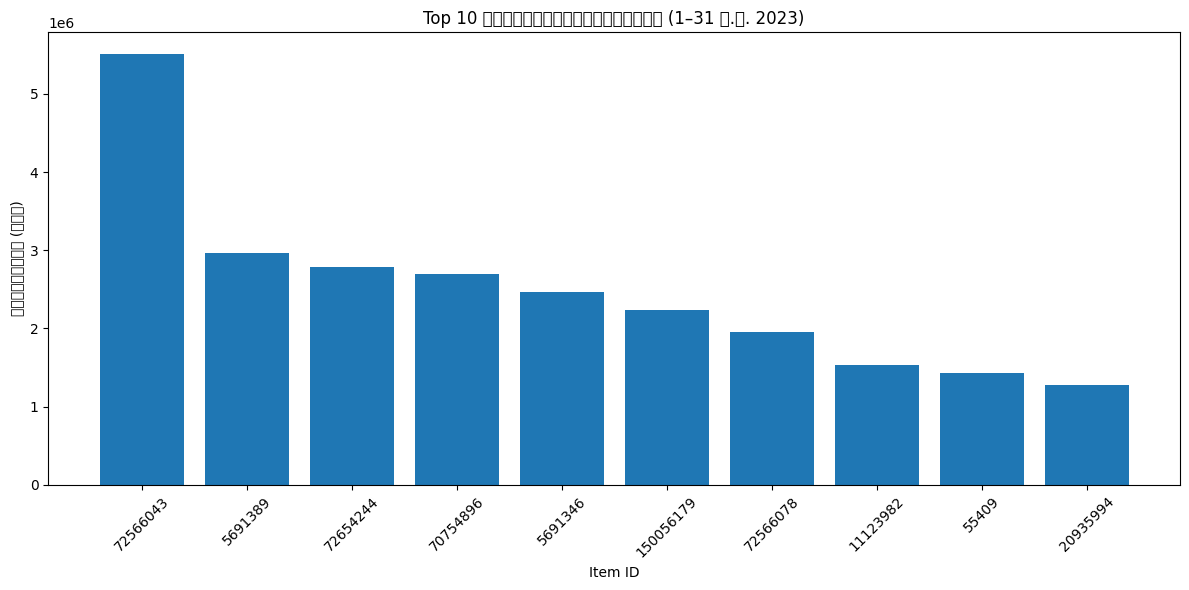

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูล
df = pd.read_csv("historical_sale_2023_1.csv")

# แปลงคอลัมน์ 'date' เป็น datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# กรองข้อมูลเฉพาะวันที่ 1 - 31 ม.ค. 2023
jan_data = df[(df['date'] >= "2023-01-01") & (df['date'] <= "2023-01-31")]

# สรุปยอดขายรวมและรายได้รวมต่อ item_id
summary = jan_data.groupby('item_id').agg({
    'units_sold': 'sum',
    'sales': 'sum'
}).reset_index()

# เรียงลำดับสินค้ารายได้สูงสุด
summary = summary.sort_values(by='sales', ascending=False)

# วาดกราฟ Top 10 สินค้า
top10 = summary.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10['item_id'].astype(str), top10['sales'])
plt.title('Top 10 รายได้สินค้าสูงสุด (1–31 ม.ค. 2023)')
plt.xlabel('Item ID')
plt.ylabel('รายได้รวม (บาท)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

promotion

In [20]:
import pandas as pd

promo_df = pd.read_csv("promotiom_2023-1.csv")
print(promo_df.columns.tolist())


['date_post', 'promotion_start', 'promotion_end', 'subcategory', 'item_id']


In [21]:
import pandas as pd

promo_df = pd.read_excel("promotiom_2023-1.xlsx")
print(promo_df.columns.tolist())
promo_df.head()


['date_post', 'promotion_start', 'promotion_end', 'subcategory', 'item_id']


date_post promotion_start promotion_end  \
0 2023-01-01      2023-01-01    2023-01-01   
1 2023-01-02      2022-12-29    2023-01-04   
2 2023-01-03      2022-12-29    2023-01-04   
3 2023-01-04      2023-01-04    2023-01-04   
4 2023-01-04      2023-01-05    2023-01-25   

                             subcategory  \
0  O-SUD KHUM VOUCHER,S-SUD KHUM VOUCHER   
1                          SOAP,CS2-SOAP   
2                          SOAP,CS2-SOAP   
3  O-SUD KHUM VOUCHER,S-SUD KHUM VOUCHER   
4              CS2-LOOSE RICE,LOOSE RICE   

                                             item_id  
0  168929550,168928695,406347877,406347641,406347...  
1  2100312,2521342,5721296,6384897,7748930,907861...  
2  2100312,2521342,5721296,6384897,7748930,907861...  
3  168929550,168928695,406347877,406347641,406347...  
4  51204056,51310022,169438150,169438196,16953632...

In [23]:
print(promo_df['item_id'].head())


0    168929550,168928695,406347877,406347641,406347...
1    2100312,2521342,5721296,6384897,7748930,907861...
2    2100312,2521342,5721296,6384897,7748930,907861...
3    168929550,168928695,406347877,406347641,406347...
4    51204056,51310022,169438150,169438196,16953632...
Name: item_id, dtype: object


In [24]:
# แปลง item_id จากหลายตัวคั่นด้วย ',' ให้เป็นหลายแถว
promo_expanded = promo_df.copy()
promo_expanded['item_id'] = promo_expanded['item_id'].astype(str)
promo_expanded = promo_expanded.assign(
    item_id=promo_expanded['item_id'].str.split(',')
).explode('item_id')

# ล้างช่องว่าง และกรองเฉพาะค่าที่เป็นตัวเลขจริง
promo_expanded['item_id'] = promo_expanded['item_id'].str.strip()
promo_expanded = promo_expanded[promo_expanded['item_id'].str.isnumeric()]
promo_expanded['item_id'] = promo_expanded['item_id'].astype(int)


In [ ]:
for _, promo in promo_expanded.iterrows():
    ...


In [25]:
# แปลง item_id ที่รวมหลายตัว แยกออกเป็นหลายแถว
promo_expanded = promo_df.copy()
promo_expanded['item_id'] = promo_expanded['item_id'].astype(str)
promo_expanded = promo_expanded.assign(
    item_id=promo_expanded['item_id'].str.split(',')
).explode('item_id')

# แปลงเป็น int และล้างช่องว่าง
promo_expanded['item_id'] = promo_expanded['item_id'].str.strip().astype(int)


ValueError: invalid literal for int() with base 10: ''

อ่านไฟล์โปรโมชั่นและเดือนมกราคม

In [33]:
import pandas as pd

# โหลดไฟล์
sales_df = pd.read_csv("january_sales.csv")
promo_df = pd.read_excel("promotiom_1_2023.xlsx")

# แปลงวันให้เป็น datetime
sales_df['date'] = pd.to_datetime(sales_df['date'], dayfirst=True)
promo_df['promotion_start'] = pd.to_datetime(promo_df['promotion_start'])
promo_df['promotion_end'] = pd.to_datetime(promo_df['promotion_end'])

# เตรียมผลลัพธ์
results = []

# วิเคราะห์ผลลัพธ์ตามโปรโมชั่นแต่ละรายการ
for _, promo in promo_df.iterrows():
    item_id = promo['item_id']
    start = promo['promotion_start']
    end = promo['promotion_end']

    # กรองยอดขายของสินค้านั้น
    item_sales = sales_df[sales_df['item_id'] == item_id]

    # ยอดขายก่อนโปร (7 วัน)
    before = item_sales[(item_sales['date'] >= start - pd.Timedelta(days=7)) & 
                        (item_sales['date'] < start)]

    # ระหว่างโปร
    during = item_sales[(item_sales['date'] >= start) & (item_sales['date'] <= end)]

    # หลังโปร (7 วัน)
    after = item_sales[(item_sales['date'] > end) & 
                       (item_sales['date'] <= end + pd.Timedelta(days=7))]

    # คำนวณยอดขายเฉลี่ย
    avg_before = before['sales'].sum() / 7
    avg_during = during['sales'].sum() / max((end - start).days + 1, 1)
    avg_after = after['sales'].sum() / 7

    # วิเคราะห์แนวโน้ม
    def trend(before, during):
        if during > before * 1.01:
            return "ขายดีขึ้น"
        elif during < before * 0.99:
            return "ขายแย่ลง"
        else:
            return "ไม่เปลี่ยนแปลง"

    results.append({
        'item_id': item_id,
        'avg_before': round(avg_before, 2),
        'avg_during': round(avg_during, 2),
        'avg_after': round(avg_after, 2),
        'effect': trend(avg_before, avg_during)
    })

# สร้างตารางวิเคราะห์ผลลัพธ์
promo_analysis = pd.DataFrame(results)

# แสดงผลลัพธ์ 10 รายการแรก
print(promo_analysis.head(100))


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\3501679286.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  sales_df['date'] = pd.to_datetime(sales_df['date'], dayfirst=True)


                                              item_id  avg_before  avg_during  \
0   168929550,168928695,406347877,406347641,406347...         0.0         0.0   
1   2100312,2521342,5721296,6384897,7748930,907861...         0.0         0.0   
2   2100312,2521342,5721296,6384897,7748930,907861...         0.0         0.0   
3   168929550,168928695,406347877,406347641,406347...         0.0         0.0   
4   51204056,51310022,169438150,169438196,16953632...         0.0         0.0   
..                                                ...         ...         ...   
69                                                NaN         0.0         0.0   
70  51204056,51310022,169438150,169438196,16953632...         0.0         0.0   
71  215953,216739,5265347,5267323,5267420,5439280,...         0.0         0.0   
72  51440121,51565682,72299592,75555157,150534189,...         0.0         0.0   
73  5985145,12455555,14213257,16321707,16928164,17...         0.0         0.0   

    avg_after          effe

In [ ]:
# กรองเฉพาะสินค้าที่มียอดขายดีขึ้นระหว่างโปรโมชั่น
promo_improved = promo_analysis[promo_analysis['effect'] == "ขายดีขึ้น"]

# แสดงผลลัพธ์ที่กรองแล้ว
print(promo_improved.head(20))  # แสดง 20 แถวแรก


Empty DataFrame
Columns: [item_id, avg_before, avg_during, avg_after, effect]
Index: []


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\1742177392.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  sales_df['date'] = pd.to_datetime(sales_df['date'], dayfirst=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\1742177392.py:26: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\1742177392.py:26: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\1742177392.py:26: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\1742177392.py:26: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASU

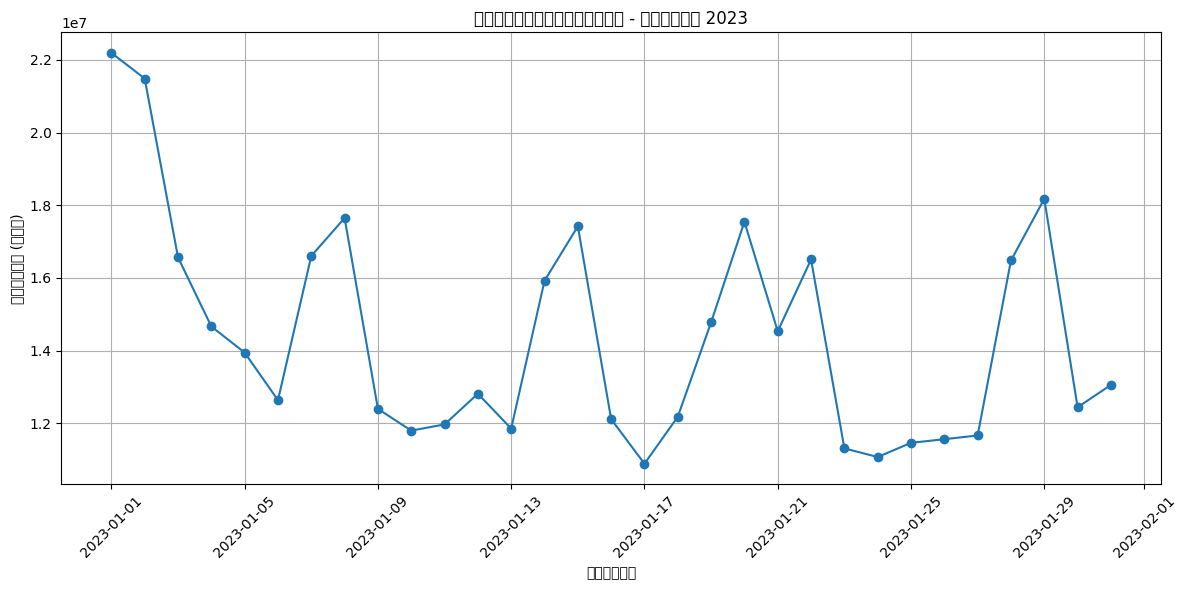

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดไฟล์ CSV ยอดขาย
sales_df = pd.read_csv("historical_sale_2023_1.csv")

# แปลงวันที่
sales_df['date'] = pd.to_datetime(sales_df['date'], dayfirst=True)

# กรองเฉพาะเดือนมกราคม 2023
jan_sales = sales_df[
    (sales_df['date'] >= "2023-01-01") & (sales_df['date'] <= "2023-01-31")
]

# รวมยอดขายรายวัน
daily_sales = jan_sales.groupby('date')['sales'].sum().reset_index()

# วาดกราฟ
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['sales'], marker='o')
plt.title("ยอดขายรวมรายวัน - มกราคม 2023")
plt.xlabel("วันที่")
plt.ylabel("ยอดขาย (บาท)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\1488780108.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  sales_df['date'] = pd.to_datetime(sales_df['date'], dayfirst=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\1488780108.py:34: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\1488780108.py:34: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\1488780108.py:34: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\1488780108.py:34: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASU

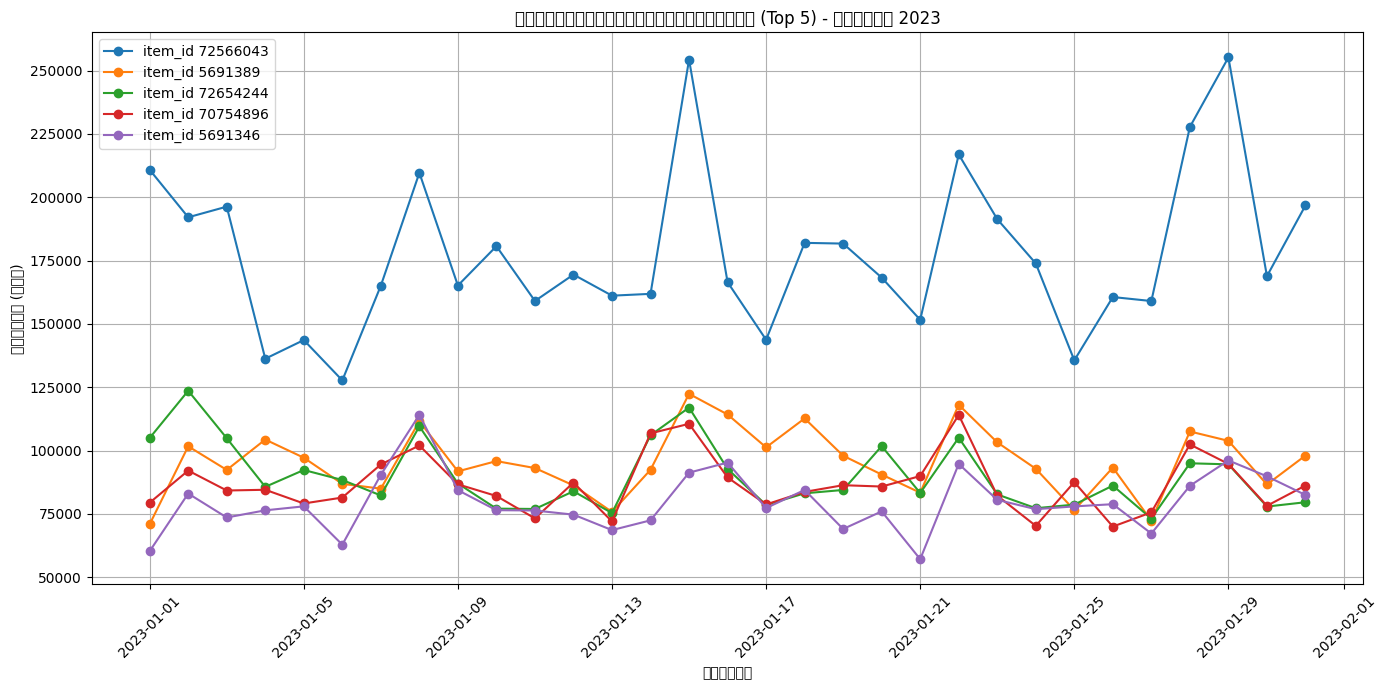

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดไฟล์ CSV ยอดขาย
sales_df = pd.read_csv("historical_sale_2023_1.csv")

# แปลงวันที่
sales_df['date'] = pd.to_datetime(sales_df['date'], dayfirst=True)

# กรองเฉพาะเดือนมกราคม 2023
jan_sales = sales_df[
    (sales_df['date'] >= "2023-01-01") & (sales_df['date'] <= "2023-01-31")
]

# รวมยอดขายรายวันของแต่ละ item_id
daily_sales_by_item = jan_sales.groupby(['date', 'item_id'])['sales'].sum().reset_index()

# เลือก 5 สินค้าที่ขายดีสุดในเดือนมกราคม
top_items = jan_sales.groupby('item_id')['sales'].sum().nlargest(5).index
top_item_sales = daily_sales_by_item[daily_sales_by_item['item_id'].isin(top_items)]

# วาดกราฟ
plt.figure(figsize=(14, 7))
for item_id in top_items:
    item_data = top_item_sales[top_item_sales['item_id'] == item_id]
    plt.plot(item_data['date'], item_data['sales'], marker='o', label=f'item_id {item_id}')

plt.title("ยอดขายรายวันแยกตามสินค้า (Top 5) - มกราคม 2023")
plt.xlabel("วันที่")
plt.ylabel("ยอดขาย (บาท)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


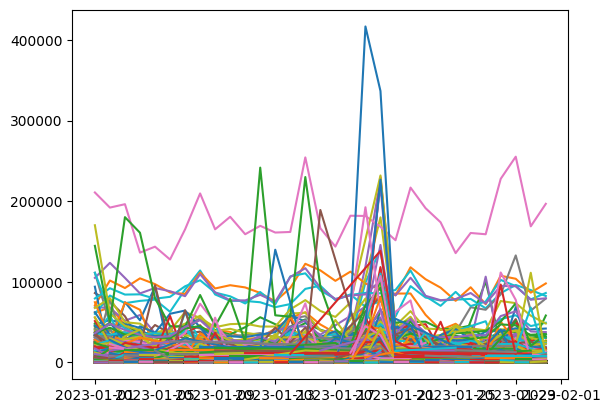

In [ ]:
# วาดกราฟทุก item_id ที่มียอดขาย
unique_items = daily_sales_by_item['item_id'].unique()

for item_id in unique_items:
    item_data = daily_sales_by_item[daily_sales_by_item['item_id'] == item_id]
    plt.plot(item_data['date'], item_data['sales'], label=f'item_id {item_id}')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\4133061198.py:15: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\4133061198.py:15: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\4133061198.py:15: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\4133061198.py:15: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\4133061198.py:15: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\4133061198.py:15: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) 

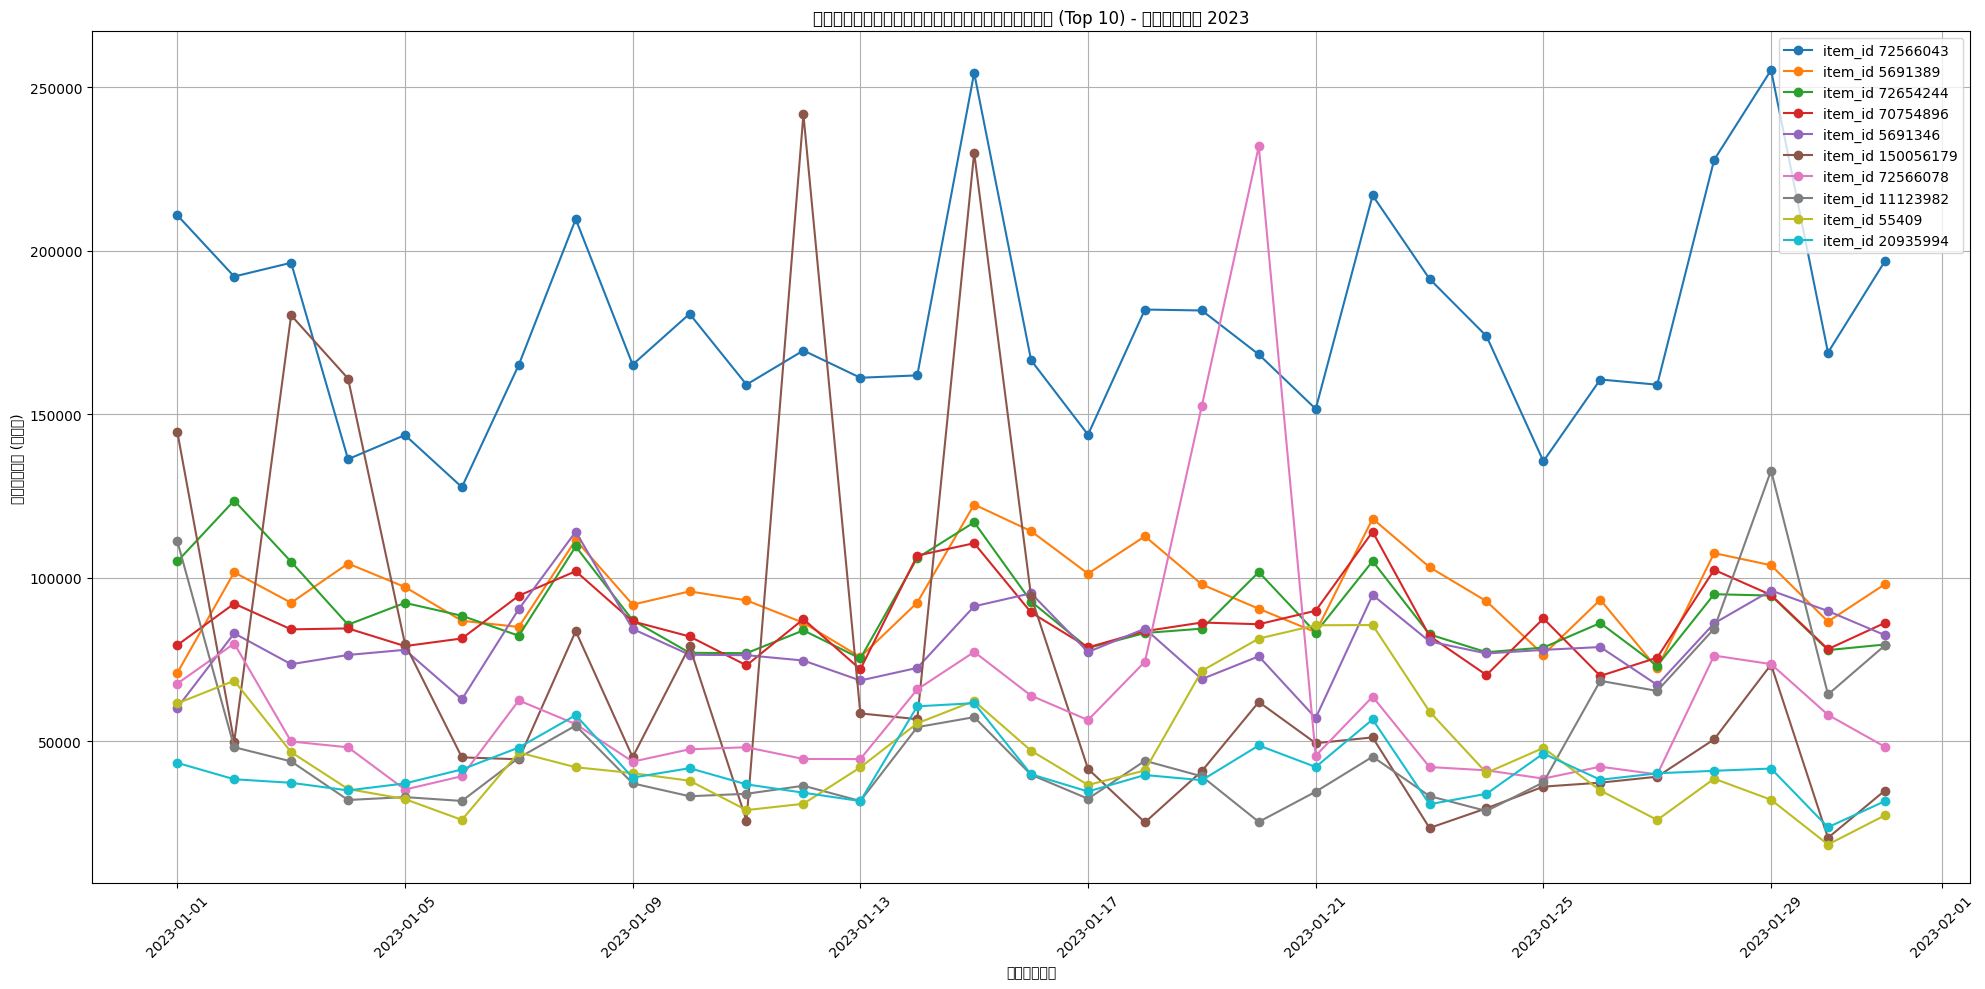

In [ ]:
plt.figure(figsize=(20, 10))  # เปลี่ยนขนาดกราฟให้ใหญ่

top_items = jan_sales.groupby('item_id')['sales'].sum().nlargest(10).index  # แสดง Top 10 พอ

for item_id in top_items:
    item_data = daily_sales_by_item[daily_sales_by_item['item_id'] == item_id]
    plt.plot(item_data['date'], item_data['sales'], marker='o', label=f'item_id {item_id}')

plt.title("ยอดขายรายวันแยกตามสินค้า (Top 10) - มกราคม 2023")
plt.xlabel("วันที่")
plt.ylabel("ยอดขาย (บาท)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\4226661031.py:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  sales_df['date'] = pd.to_datetime(sales_df['date'], dayfirst=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\4226661031.py:48: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\4226661031.py:48: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\4226661031.py:48: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\4226661031.py:48: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASU

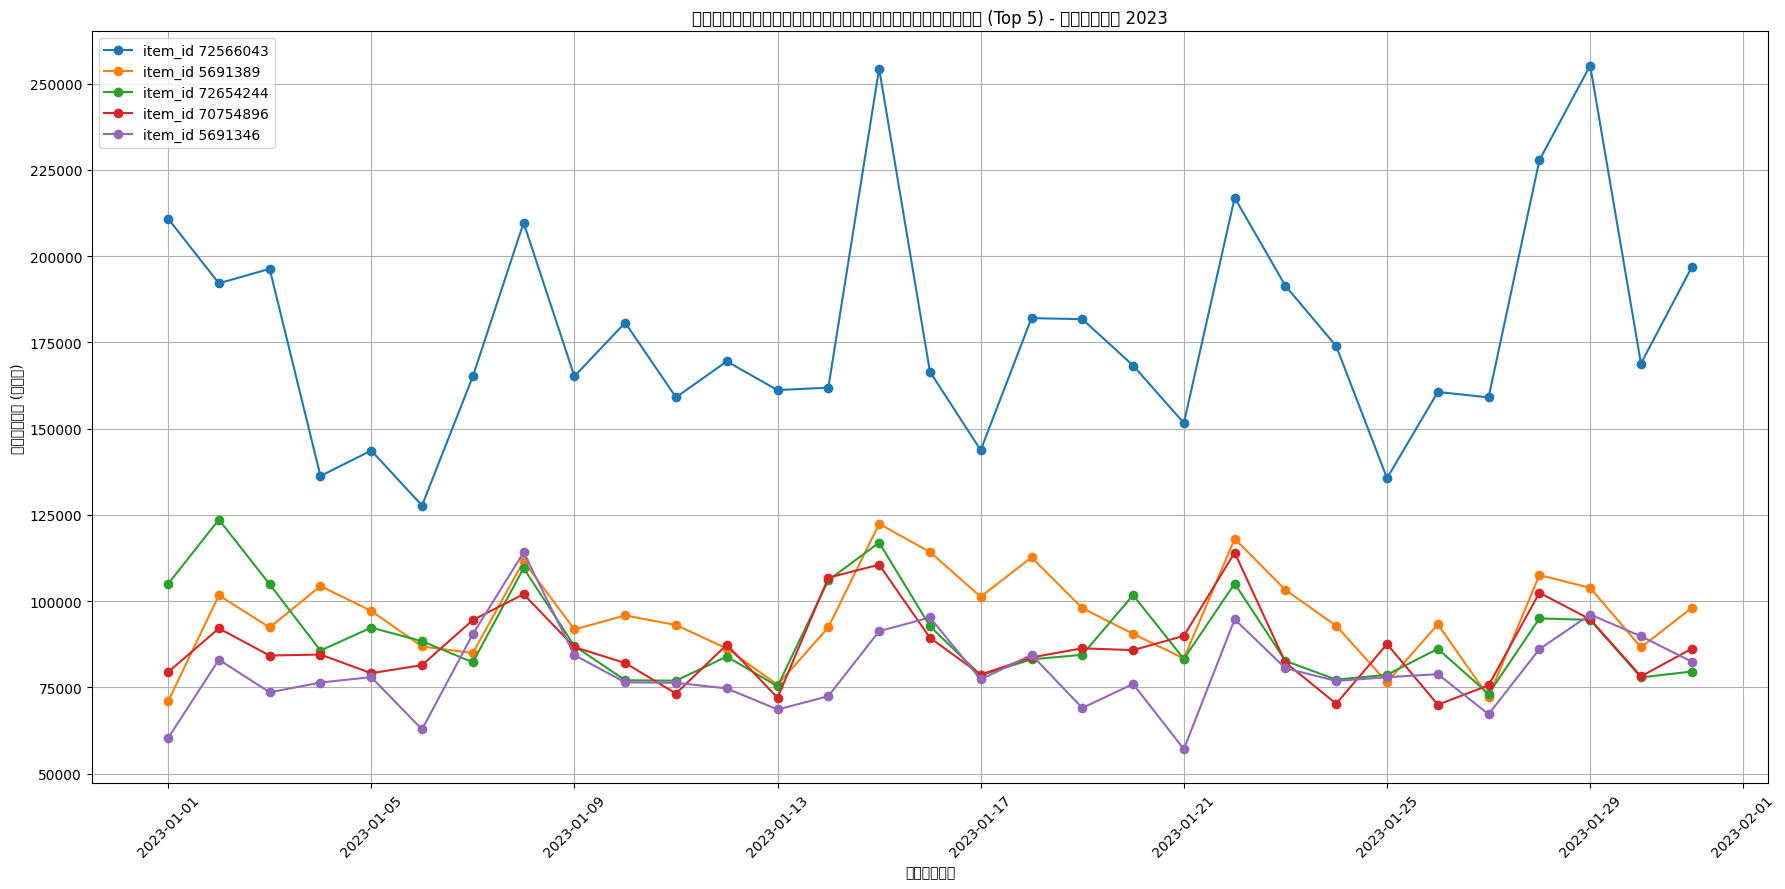

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดยอดขายและโปรโมชัน
sales_df = pd.read_csv("historical_sale_2023_1.csv")
promo_df = pd.read_excel("promotiom_2023-1.xlsx")

# แปลงวัน
sales_df['date'] = pd.to_datetime(sales_df['date'], dayfirst=True)
promo_df['promotion_start'] = pd.to_datetime(promo_df['promotion_start'])
promo_df['promotion_end'] = pd.to_datetime(promo_df['promotion_end'])

# กรองเฉพาะเดือน ม.ค. 2023
jan_sales = sales_df[
    (sales_df['date'] >= "2023-01-01") & (sales_df['date'] <= "2023-01-31")
]

# รวมยอดขายรายวัน
daily_sales_by_item = jan_sales.groupby(['date', 'item_id'])['sales'].sum().reset_index()

# Top 5 สินค้าขายดี
top_items = jan_sales.groupby('item_id')['sales'].sum().nlargest(5).index
top_item_sales = daily_sales_by_item[daily_sales_by_item['item_id'].isin(top_items)]

# วาดกราฟ
plt.figure(figsize=(18, 9))
for item_id in top_items:
    # กราฟหลัก
    item_data = top_item_sales[top_item_sales['item_id'] == item_id]
    plt.plot(item_data['date'], item_data['sales'], marker='o', label=f'item_id {item_id}')

    # จุดโปรโมชัน (ทุกวันในช่วงโปร)
promo_dates = promo_df[promo_df['item_id'] == item_id][['promotion_start', 'promotion_end']]
for _, row in promo_dates.iterrows():
    date_range = pd.date_range(start=row['promotion_start'], end=row['promotion_end'])
    for promo_date in date_range:
        sales_on_date = item_data[item_data['date'] == promo_date]
        if not sales_on_date.empty:
            plt.scatter(promo_date, sales_on_date['sales'].values[0], color='red', s=80, edgecolors='black', zorder=5)


plt.title("ยอดขายรายวันพร้อมจุดโปรโมชั่น (Top 5) - มกราคม 2023")
plt.xlabel("วันที่")
plt.ylabel("ยอดขาย (บาท)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# โหลดไฟล์ CSV
df = pd.read_csv("historical_sale_2023_1.csv")

# แปลงคอลัมน์ date ให้เป็น datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# กรองข้อมูลเฉพาะช่วงวันที่ 1 ม.ค. ถึง 31 ม.ค. 2023
jan_data = df[(df['date'] >= "2023-01-01") & (df['date'] <= "2023-01-31")]

# แสดงผลลัพธ์
print(jan_data)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\623797035.py:7: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


               date  store_id   item_id      sales  units_sold
534688   2023-01-21      6619      1899   86.50000       0.432
534689   2023-01-21      5505  26455315   64.50000       3.000
534690   2023-01-21      5018  51954665  393.22028       3.000
534691   2023-01-21      5018  51178800   63.00000       4.000
534692   2023-01-21      2450   5874599  109.35000       9.000
...             ...       ...       ...        ...         ...
13900469 2023-01-19      3207   1565826   37.38000       2.000
13900470 2023-01-19      6580  20160852  205.66220       2.000
13900471 2023-01-19      5095  70286183  185.05000       2.000
13900472 2023-01-19      5018  74752995  166.36000       2.000
13900473 2023-01-19      5032  50860656   92.52000       1.000

[2356320 rows x 5 columns]


In [ ]:
import pandas as pd

# โหลดข้อมูล
df = pd.read_csv("historical_sale_2023_1.csv")

# แปลงวันที่
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# กรองเฉพาะข้อมูลวันที่ 1-31 ม.ค. 2023
jan_data = df[(df['date'] >= "2023-01-01") & (df['date'] <= "2023-01-31")]

# บันทึกเป็นไฟล์ CSV ใหม่
jan_data.to_csv("january_sales.csv", index=False)

print("บันทึกไฟล์สำเร็จ: january_sales.csv")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21876\1515807575.py:7: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


บันทึกไฟล์สำเร็จ: january_sales.csv


In [ ]:
import matplotlib.pyplot as plt

# โหลดข้อมูลโปรโมชั่น
promo_df = pd.read_excel(r"C:/miewmiew/Hackathon/Hack1/promotiom_2023-1.csv")
promo_df['promotion_start'] = pd.to_datetime(promo_df['promotion_start'])
promo_df['promotion_end'] = pd.to_datetime(promo_df['promotion_end'])

# เตรียมข้อมูลยอดขายรวมต่อวันต่อ item_id
daily_sales = january_df.groupby(['date', 'item_id'])['sales'].sum().reset_index()

# คำนวณยอดขายเฉลี่ยก่อนและระหว่างโปรโมชัน เพื่อดูว่า "ขายดีขึ้น" หรือไม่
results = []
for _, row in promo_df.iterrows():
    item_id = row['item_id']
    start = row['promotion_start']
    end = row['promotion_end']

    item_data = daily_sales[daily_sales['item_id'] == item_id]
    before = item_data[(item_data['date'] >= start - pd.Timedelta(days=7)) & (item_data['date'] < start)]
    during = item_data[(item_data['date'] >= start) & (item_data['date'] <= end)]

    avg_before = before['sales'].sum() / 7
    avg_during = during['sales'].sum() / max((end - start).days + 1, 1)

    if avg_during > avg_before * 1.1:
        results.append({
            'item_id': item_id,
            'promotion_dates': pd.date_range(start=start, end=end)
        })

# วาดกราฟยอดขายรายวันพร้อมจุดแสดงวันที่มีโปรและขายดีขึ้น
plt.figure(figsize=(20, 10))
highlighted_items = set([r['item_id'] for r in results])

for item_id in highlighted_items:
    item_data = daily_sales[daily_sales['item_id'] == item_id]
    plt.plot(item_data['date'], item_data['sales'], marker='o', label=f'item_id {item_id}')

    # จุดโปรโมชั่น
    for r in results:
        if r['item_id'] == item_id:
            for promo_date in r['promotion_dates']:
                day_sales = item_data[item_data['date'] == promo_date]
                if not day_sales.empty:
                    plt.scatter(promo_date, day_sales['sales'].values[0], color='red', s=100, edgecolors='black', zorder=5)

plt.title("สินค้าที่มียอดขายดีขึ้นระหว่างโปรโมชั่น (ม.ค. 2023)")
plt.xlabel("วันที่")
plt.ylabel("ยอดขาย (บาท)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

In [72]:
import pandas as pd
from difflib import get_close_matches

# โหลดข้อมูล
file_path = "item_hierarchy.csv"
df = pd.read_csv(file_path)

# ดึงเฉพาะคำซ้ำและไม่ซ้ำใน subcategory
subcategory_list = df['subcategory'].dropna().unique().tolist()
subcategory_list = sorted(set([s.strip().lower() for s in subcategory_list]))  # ลบซ้ำ + ทำให้เป็น lowercase

# สร้างกลุ่มคำคล้ายกัน
grouped_keywords = []
used = set()

for word in subcategory_list:
    if word in used:
        continue
    matches = get_close_matches(word, subcategory_list, n=10, cutoff=0.8)
    if len(matches) > 1:
        grouped_keywords.append(matches)
        used.update(matches)

# แสดงผลลัพธ์
for i, group in enumerate(grouped_keywords, 1):
    print(f"กลุ่มที่ {i}: {group}")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19228\1386511023.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


กลุ่มที่ 1: ['accessories', 'av accessories', 'men accessories', 'cs2-accessories', 'baby accessories']
กลุ่มที่ 2: ['agricultural product', 'cs2-agricultural product', 'b2b-agricultural product']
กลุ่มที่ 3: ['b2b-bakery bought in', 'bakery bought in']
กลุ่มที่ 4: ['b2b-baking needs', 'baking needs', 'b2b-cooking needs']
กลุ่มที่ 5: ['b2b-canned food', 'canned food']
กลุ่มที่ 6: ['b2b-chilled convenience', 'chilled convenience', 'ws chilled convenience']
กลุ่มที่ 7: ['b2b-cold beverage', 'cold beverage', 'cp-cold beverage', 'b2b-hot beverage']
กลุ่มที่ 8: ['b2b-confectionery', 'confectionery']
กลุ่มที่ 9: ['b2b-dairy grocery', 'dairy grocery', 'cp-dairy grocery']
กลุ่มที่ 10: ['b2b-fish+seafood', 'cs2-fish+seafood', 'fish+seafood']
กลุ่มที่ 11: ['b2b-food supplement', 'food supplement', 'cp-food supplement', 'cs2-food supplyment']
กลุ่มที่ 12: ['b2b-frozen meat', 'frozen meat']
กลุ่มที่ 13: ['b2b-pasta+instant food', 'pasta+instant food']
กลุ่มที่ 14: ['b2b-preserved+ dried', 'cs2-pre